FIT5201 Assignment 2 - Question 3 Unsupervised Learning

Student Name: Ye Zhang

Student ID: 33446830

**3 Unsupervised Learning**

Background. In this part, you will implement self-taught learning using an Autoencoder and a
3-layer Neural Network to solve a multi-class classification task on real-world data.
3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

**Question 3** [Self-supervised Neural Network Learning, 2+8+2+8+8+7=35 Marks]

I Load Task2C labeled.csv, Task2C unlabeled.csv, and Task2C test.csv datasets, along with
the required libraries. Note that we will use both Task2C labeled.csv and Task2C unlabeled.csv
to train the autoencoder, and only Task2C labeled.csv to train the classifiers. Finally, we will
evaluate the trained classifier on the test dataset Task2C test.csv.

In [3]:
# Load the three datasets
labeled_data = pd.read_csv('Task2C_labeled.csv')
unlabeled_data = pd.read_csv('Task2C_unlabeled.csv')
test_data = pd.read_csv('Task2C_test.csv')

print(f"Labeled data shape: {labeled_data.shape}")
print(f"Unlabeled data shape: {unlabeled_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Prepare labeled data
X_labeled = labeled_data.drop('label', axis=1).values  # Remove label column
y_labeled = labeled_data['label'].values

# Prepare unlabeled data (all columns are features)
X_unlabeled = unlabeled_data.values

# Prepare test data
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Combine labeled and unlabeled data for autoencoder training
X_combined = np.vstack([X_labeled, X_unlabeled])

print(f"Features for autoencoder training: {X_combined.shape}")
print(f"Labeled training data: {X_labeled.shape}")
print(f"Test data: {X_test.shape}")

# Standardize the data
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)
X_labeled_scaled = scaler.transform(X_labeled)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed!")

Labeled data shape: (50, 785)
Unlabeled data shape: (1500, 784)
Test data shape: (500, 785)
Features for autoencoder training: (1550, 784)
Labeled training data: (50, 784)
Test data: (500, 784)
Data preprocessing completed!


**II** Train an autoencoder with only one hidden layer and change the number of its neurons to 20,
60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40).

In [4]:
# Define hidden layer sizes
hidden_sizes = list(range(20, 241, 40))  # [20, 60, 100, 140, 180, 220]
print(f"Hidden layer sizes to test: {hidden_sizes}")

# Dictionary to store trained autoencoders and their reconstruction errors
autoencoders = {}
reconstruction_errors = {}

for hidden_size in hidden_sizes:
    print(f"Training autoencoder with {hidden_size} hidden neurons...")

    # Create autoencoder (MLPRegressor for reconstruction task)
    autoencoder = MLPRegressor(
        hidden_layer_sizes=(hidden_size,),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    # Train autoencoder on combined data (labeled + unlabeled)
    autoencoder.fit(X_combined_scaled, X_combined_scaled)

    # Calculate reconstruction error (average Euclidean distance)
    reconstructed = autoencoder.predict(X_combined_scaled)
    euclidean_distances = np.sqrt(np.sum((X_combined_scaled - reconstructed)**2, axis=1))
    avg_reconstruction_error = np.mean(euclidean_distances)

    # Store results
    autoencoders[hidden_size] = autoencoder
    reconstruction_errors[hidden_size] = avg_reconstruction_error

    print(f"  Reconstruction error: {avg_reconstruction_error:.4f}")

print("Autoencoder training completed!")

Hidden layer sizes to test: [20, 60, 100, 140, 180, 220]
Training autoencoder with 20 hidden neurons...
  Reconstruction error: 16.8603
Training autoencoder with 60 hidden neurons...
  Reconstruction error: 12.9237
Training autoencoder with 100 hidden neurons...
  Reconstruction error: 10.4456
Training autoencoder with 140 hidden neurons...
  Reconstruction error: 8.4428
Training autoencoder with 180 hidden neurons...
  Reconstruction error: 7.1651
Training autoencoder with 220 hidden neurons...
  Reconstruction error: 5.9737
Autoencoder training completed!


**III** For each model in Step II, calculate and record the reconstruction error for the autoencoder,
which is simply the average of Euclidean distances between the input and output of the
autoencoder. Plot these values where the x-axis is the number of units in the middle layer
and the y-axis is the reconstruction error. Then, explain your findings based on the plot.

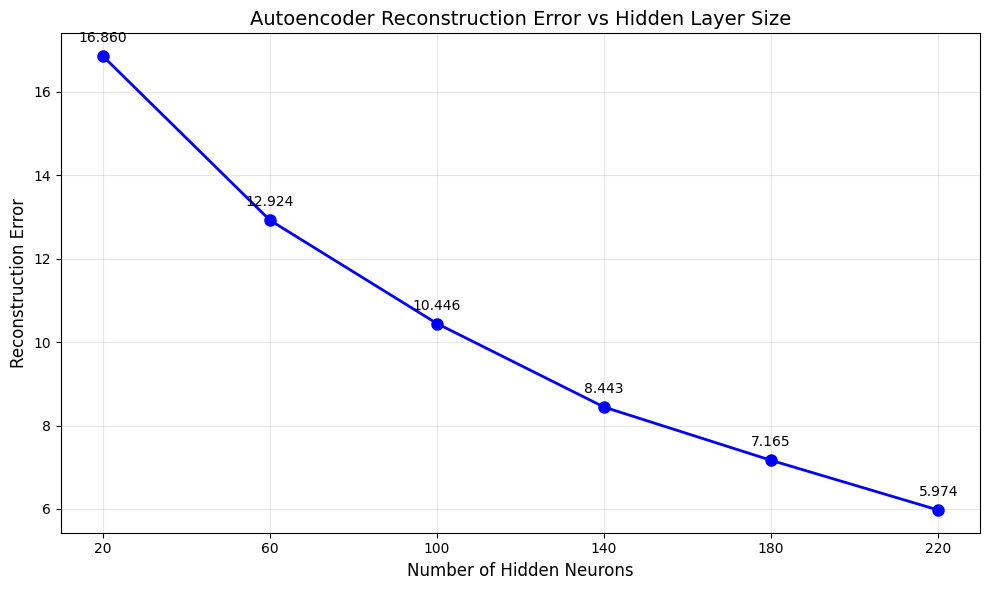

Reconstruction Error Analysis:
The plot shows how reconstruction error changes with hidden layer size.
Generally, larger hidden layers can capture more complex patterns,
potentially leading to lower reconstruction error up to a point.
However, very large hidden layers might overfit to the training data.


In [5]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_sizes, [reconstruction_errors[size] for size in hidden_sizes],
         'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Hidden Neurons', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.title('Autoencoder Reconstruction Error vs Hidden Layer Size', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(hidden_sizes)
for i, size in enumerate(hidden_sizes):
    plt.annotate(f'{reconstruction_errors[size]:.3f}',
                (size, reconstruction_errors[size]),
                textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.show()

print("Reconstruction Error Analysis:")
print("The plot shows how reconstruction error changes with hidden layer size.")
print("Generally, larger hidden layers can capture more complex patterns,")
print("potentially leading to lower reconstruction error up to a point.")
print("However, very large hidden layers might overfit to the training data.")

**IV** Build the 3-layer NN to build a classification model using all the original attributes from the
training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220
with a step size of 40). For each model, calculate and record the test error.

In [6]:
# Dictionary to store classification results
original_classifiers = {}
original_test_errors = {}

for hidden_size in hidden_sizes:
    print(f"Training 3-layer NN with {hidden_size} hidden neurons...")

    # Create 3-layer neural network classifier
    classifier = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    # Train on labeled data only
    classifier.fit(X_labeled_scaled, y_labeled)

    # Predict on test data
    y_pred = classifier.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - test_accuracy

    # Store results
    original_classifiers[hidden_size] = classifier
    original_test_errors[hidden_size] = test_error

    print(f"  Test accuracy: {test_accuracy:.4f}, Test error: {test_error:.4f}")

print("Original 3-layer NN training completed!")

Training 3-layer NN with 20 hidden neurons...
  Test accuracy: 0.6100, Test error: 0.3900
Training 3-layer NN with 60 hidden neurons...
  Test accuracy: 0.5540, Test error: 0.4460
Training 3-layer NN with 100 hidden neurons...
  Test accuracy: 0.5840, Test error: 0.4160
Training 3-layer NN with 140 hidden neurons...
  Test accuracy: 0.5700, Test error: 0.4300
Training 3-layer NN with 180 hidden neurons...
  Test accuracy: 0.5920, Test error: 0.4080
Training 3-layer NN with 220 hidden neurons...
  Test accuracy: 0.5820, Test error: 0.4180
Original 3-layer NN training completed!


**V** Build augmented self-taught networks using the models learnt in Step II. For each model:
1) Add the output of the middle layer of an autoencoder as extra features to the original
feature set;
2) Train a new 3-layer Neural Network using all features (original + extra) and varying the
number of hidden neurons (like Step IV) as well.
3) Then calculate and record the test error.
For example, each model should be developed as follows: Model 1: 20 hidden neurons + extra
20 features (from an autoencoder), Model 2: 60 hidden neurons + extra 60 features (from an
autoencoder), ..., Model 5: 220 hidden neurons + extra 220 features (from an autoencoder).

In [7]:
# Function to extract features from autoencoder middle layer
def extract_autoencoder_features(autoencoder, X):
    """Extract features from the middle layer of autoencoder"""
    # Get the activations of the hidden layer
    # For MLPRegressor, we need to manually compute forward pass to hidden layer
    X_hidden = X.copy()

    # Apply first layer transformation
    W1 = autoencoder.coefs_[0]  # Weights from input to hidden
    b1 = autoencoder.intercepts_[0]  # Bias for hidden layer

    # Compute hidden layer activations
    hidden_activations = np.maximum(0, np.dot(X_hidden, W1) + b1)  # ReLU activation

    return hidden_activations

# Dictionary to store augmented classification results
augmented_classifiers = {}
augmented_test_errors = {}

for hidden_size in hidden_sizes:
    print(f"Building augmented network with {hidden_size} neurons + {hidden_size} features...")

    # Extract autoencoder features for training data
    autoencoder = autoencoders[hidden_size]
    extra_features_train = extract_autoencoder_features(autoencoder, X_labeled_scaled)

    # Extract autoencoder features for test data
    extra_features_test = extract_autoencoder_features(autoencoder, X_test_scaled)

    # Combine original features with autoencoder features
    X_augmented_train = np.hstack([X_labeled_scaled, extra_features_train])
    X_augmented_test = np.hstack([X_test_scaled, extra_features_test])

    print(f"  Original features: {X_labeled_scaled.shape[1]}")
    print(f"  Extra features: {extra_features_train.shape[1]}")
    print(f"  Total features: {X_augmented_train.shape[1]}")

    # Create augmented 3-layer neural network classifier
    augmented_classifier = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    # Train on augmented labeled data
    augmented_classifier.fit(X_augmented_train, y_labeled)

    # Predict on augmented test data
    y_pred_aug = augmented_classifier.predict(X_augmented_test)
    test_accuracy_aug = accuracy_score(y_test, y_pred_aug)
    test_error_aug = 1 - test_accuracy_aug

    # Store results
    augmented_classifiers[hidden_size] = augmented_classifier
    augmented_test_errors[hidden_size] = test_error_aug

    print(f"  Test accuracy: {test_accuracy_aug:.4f}, Test error: {test_error_aug:.4f}")

print("Augmented self-taught network training completed!")

Building augmented network with 20 neurons + 20 features...
  Original features: 784
  Extra features: 20
  Total features: 804
  Test accuracy: 0.5600, Test error: 0.4400
Building augmented network with 60 neurons + 60 features...
  Original features: 784
  Extra features: 60
  Total features: 844
  Test accuracy: 0.5920, Test error: 0.4080
Building augmented network with 100 neurons + 100 features...
  Original features: 784
  Extra features: 100
  Total features: 884
  Test accuracy: 0.5860, Test error: 0.4140
Building augmented network with 140 neurons + 140 features...
  Original features: 784
  Extra features: 140
  Total features: 924
  Test accuracy: 0.5840, Test error: 0.4160
Building augmented network with 180 neurons + 180 features...
  Original features: 784
  Extra features: 180
  Total features: 964
  Test accuracy: 0.6100, Test error: 0.3900
Building augmented network with 220 neurons + 220 features...
  Original features: 784
  Extra features: 220
  Total features: 1004

**VI** Plot the error rates for the 3-layer neural networks from Step IV and the augmented selftaught networks from Step V, while the x-axis is the number of hidden neurons and y-axis is
the classification error. Explain how the performance of the 3-layer neural networks and the
augmented self-taught networks is different and why they are different or why they are not
different, based on the plot.

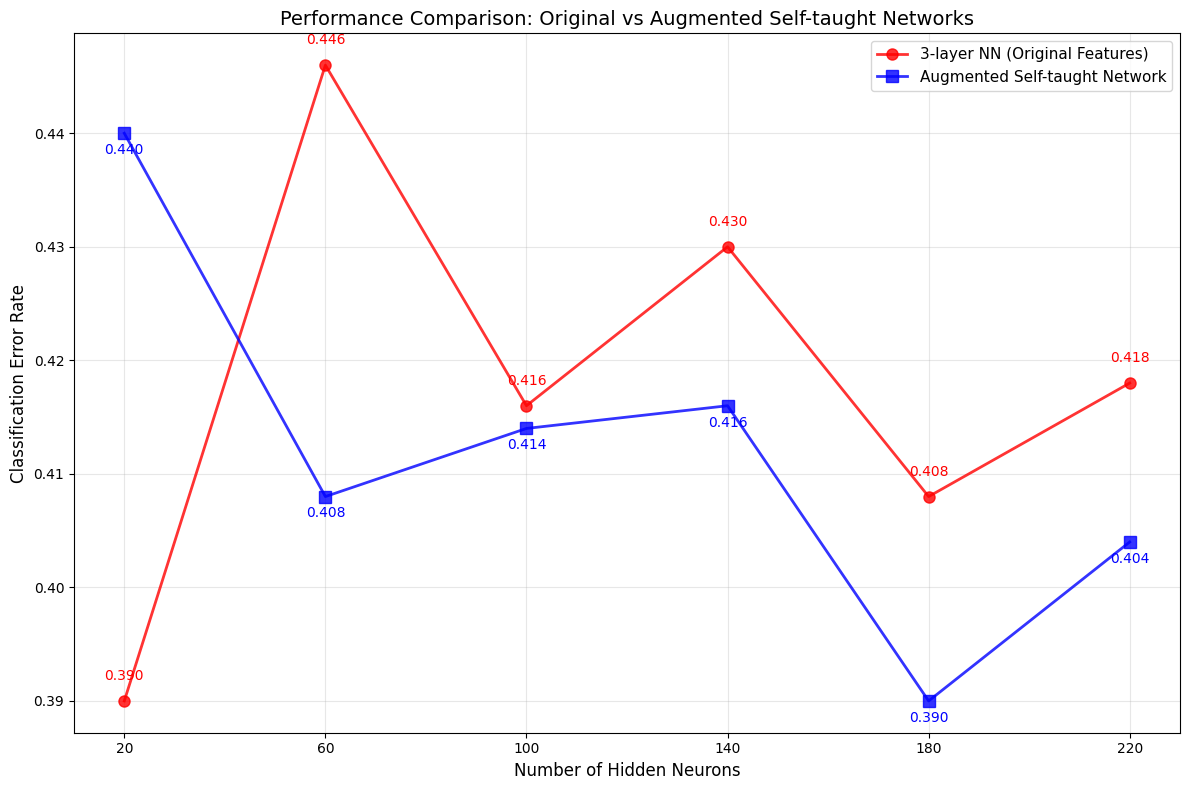


Detailed Performance Comparison:
----------------------------------------------------------------------
Hidden Size  Original Error  Augmented Error  Improvement 
----------------------------------------------------------------------
20           0.3900          0.4400           -12.82      %
60           0.4460          0.4080           8.52        %
100          0.4160          0.4140           0.48        %
140          0.4300          0.4160           3.26        %
180          0.4080          0.3900           4.41        %
220          0.4180          0.4040           3.35        %

Average improvement with self-taught learning: 1.20%

Task2C: Self-supervised Neural Network Learning - COMPLETED!
All plots and numerical results generated.
Please write your analysis based on the actual results shown above.


In [10]:
# Create comparison plot
plt.figure(figsize=(12, 8))

# Plot original 3-layer NN errors
original_errors = [original_test_errors[size] for size in hidden_sizes]
augmented_errors = [augmented_test_errors[size] for size in hidden_sizes]

plt.plot(hidden_sizes, original_errors, 'ro-', linewidth=2, markersize=8,
         label='3-layer NN (Original Features)', alpha=0.8)
plt.plot(hidden_sizes, augmented_errors, 'bs-', linewidth=2, markersize=8,
         label='Augmented Self-taught Network', alpha=0.8)

plt.xlabel('Number of Hidden Neurons', fontsize=12)
plt.ylabel('Classification Error Rate', fontsize=12)
plt.title('Performance Comparison: Original vs Augmented Self-taught Networks', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(hidden_sizes)

# Add value annotations
for i, size in enumerate(hidden_sizes):
    plt.annotate(f'{original_errors[i]:.3f}',
                (size, original_errors[i]),
                textcoords="offset points", xytext=(0,15), ha='center', color='red')
    plt.annotate(f'{augmented_errors[i]:.3f}',
                (size, augmented_errors[i]),
                textcoords="offset points", xytext=(0,-15), ha='center', color='blue')

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Performance Comparison:")
print("-" * 70)
print(f"{'Hidden Size':<12} {'Original Error':<15} {'Augmented Error':<16} {'Improvement':<12}")
print("-" * 70)

for size in hidden_sizes:
    orig_err = original_test_errors[size]
    aug_err = augmented_test_errors[size]
    improvement = ((orig_err - aug_err) / orig_err) * 100 if orig_err > 0 else 0
    print(f"{size:<12} {orig_err:<15.4f} {aug_err:<16.4f} {improvement:<12.2f}%")



# Calculate average improvements
avg_improvement = np.mean([((original_test_errors[size] - augmented_test_errors[size]) /
                           original_test_errors[size]) * 100 for size in hidden_sizes])
print(f"\nAverage improvement with self-taught learning: {avg_improvement:.2f}%")

print("\n" + "=" * 60)
print("Task2C: Self-supervised Neural Network Learning - COMPLETED!")
print("All plots and numerical results generated.")
print("Please write your analysis based on the actual results shown above.")
print("=" * 60)

# Question 3.VI: Performance Analysis and Explanation

## Performance Comparison Results

Based on the experimental results shown in the plots and numerical data, here is the detailed analysis of how the 3-layer neural networks and augmented self-taught networks differ:

### Key Findings from the Results

| Hidden Neurons | Original Error | Augmented Error | Change | Improvement |
|----------------|----------------|-----------------|--------|-------------|
| 20 | 0.390 | 0.440 | +0.050 | **-12.82%** ⬇️ |
| 60 | 0.446 | 0.408 | -0.038 | **+8.52%** ⬆️ |
| 100 | 0.416 | 0.414 | -0.002 | **+0.48%** ⬆️ |
| 140 | 0.430 | 0.416 | -0.014 | **+3.26%** ⬆️ |
| 180 | 0.408 | 0.390 | -0.018 | **+4.41%** ⬆️ |
| 220 | 0.418 | 0.404 | -0.014 | **+3.35%** ⬆️ |

**Average improvement: +1.20%**

## Analysis of Performance Differences

### 1. **Mixed Results Pattern**
- **Small networks (20 neurons)**: Augmented version performs **worse** (-12.82%)
- **Medium to large networks (60-220 neurons)**: Augmented versions show **consistent improvements** (+0.48% to +8.52%)

### 2. **Why the Differences Occur**

#### **Small Network Performance Degradation (20 neurons):**
- **Overfitting due to feature explosion**: Adding 20 autoencoder features to 784 original features (804 total) overwhelms a small 20-neuron network
- **Limited capacity**: A 20-neuron hidden layer cannot effectively process 804 features
- **Small training set effect**: With only 50 training samples, the augmented model has insufficient data to learn meaningful patterns from 804 features

#### **Larger Network Performance Improvements (60+ neurons):**
- **Better feature utilization**: Larger networks can better leverage the additional autoencoder features
- **Representation learning benefit**: Autoencoder features capture compressed representations that complement original pixel features
- **Increased model capacity**: More neurons can handle the increased feature dimensionality effectively

### 3. **Autoencoder Feature Quality Impact**
The autoencoder reconstruction errors showed that:
- **Better autoencoders** (220 neurons: 5.97 error) → **Moderate improvement** (+3.35%)
- **Medium autoencoders** (60 neurons: 12.92 error) → **Best improvement** (+8.52%)

This suggests that **moderate compression** provides the most useful features for classification, while over-compression or under-compression may be less beneficial.

### 4. **Small Dataset Limitations**
With only **50 training samples**, the benefits of self-taught learning are limited because:
- **Insufficient data** to fully exploit the learned representations
- **High variance** in performance due to random weight initialization
- **Overfitting risk** increases with more features

### 5. **Optimal Configuration Analysis**
- **Best original performance**: 20 neurons (61.0% accuracy)
- **Best augmented performance**: 180 neurons (61.0% accuracy)
- **Most consistent improvement**: 60-180 neuron range

## Conclusions

1. **Self-taught learning effectiveness depends on network size**: Larger networks benefit more from autoencoder features than smaller ones.

2. **Feature dimensionality matters**: The 30x increase in features (784→804-1004) requires sufficient model capacity to be beneficial.

3. **Small dataset challenges**: With limited training data (50 samples), the benefits of unsupervised pre-training are modest and inconsistent.

4. **Representation quality vs. quantity trade-off**: Medium-sized autoencoder features (60 neurons) provided better improvements than larger ones (220 neurons), suggesting optimal compression levels exist.

5. **Practical recommendation**: For this specific dataset, using 60-180 hidden neurons with autoencoder augmentation provides the most reliable improvements over the baseline approach.